In [1]:
import lasio
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prov import identifier


import view_well_file
import interpolation

# Стандартная загрузка всех файлов 

In [2]:
import importlib
importlib.reload(view_well_file)


<module 'view_well_file' from 'C:\\Users\\1\\Downloads\\view_well_file.py'>

In [3]:
DATA_DIR = "..\\Downloads\\data\\las"
EXCEL_DIR = "..\\Downloads\\data"

In [4]:
well_idx = []

In [5]:
for filename in os.listdir(DATA_DIR):
    # Print each filename
    well_idx.append(filename.split("_")[0])
    print(filename)

12_continuous.las
12_discrete.las
13_continuous.las
13_discrete.las
14_continuous.las
14_discrete.las
15_continuous.las
15_discrete.las
16_continuous.las
16_discrete.las
17_continuous.las
17_discrete.las
18_continuous.las
18_discrete.las
19_continuous.las
19_discrete.las
20_continuous.las
20_discrete.las
22_continuous.las
22_discrete.las
23_continuous.las
23_discrete.las
24_continuous.las
24_discrete.las
25_continuous.las
25_discrete.las
26_continuous.las
26_discrete.las
27_continuous.las
27_discrete.las
28_continuous.las
28_discrete.las
29_continuous.las
29_discrete.las
30_continuous.las
30_discrete.las
31_continuous.las
31_discrete.las
33_continuous.las
33_discrete.las
34_continuous.las
34_discrete.las
35_continuous.las
35_discrete.las
36_continuous.las
36_discrete.las
37_continuous.las
37_discrete.las
38_continuous.las
38_discrete.las
39_continuous.las
39_discrete.las
40_continuous.las
40_discrete.las
41_continuous.las
41_discrete.las
42_continuous.las
42_discrete.las
43_continuous.

In [6]:
well_idx = set(well_idx)

In [7]:
len(well_idx)

41

In [8]:
type(list(well_idx)[0])

str

In [9]:
excel = pd.read_excel(EXCEL_DIR + "\\Отбивки пласта АС11-2.xlsx")

In [10]:
upper_bounds = excel.iloc[::2].copy()
upper_bounds.rename(columns={'Z': 'upper'}, inplace=True)
upper_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [11]:
lower_bounds = excel.iloc[1::2].copy()
lower_bounds.rename(columns={'Z': 'lower'}, inplace=True)
lower_bounds.drop(['Surface', 'MD'], inplace=True, axis=1)

In [12]:
target_layers = pd.merge(upper_bounds, lower_bounds, on='Well identifier', how='outer')
target_layers['Well identifier'] = target_layers['Well identifier'].astype(str)
target_layers = target_layers[target_layers['Well identifier'].isin(well_idx)]


In [13]:
target_layers

,Well identifier,upper,lower
1,12,-2161.95,-2183.98
2,13,-2158.72,-2175.36
3,14,-2170.38,-2190.59
4,15,-2170.84,-2188.69
5,16,-2157.70,-2178.94
6,17,-2150.80,-2171.09
7,18,-2146.87,-2167.39
8,19,-2129.24,-2150.87
9,20,-2141.56,-2162.04
10,22,-2129.92,-2146.85


In [14]:
target_layers.iloc[30]

Well identifier         44
upper             -2128.99
lower             -2145.62
Name: 32, dtype: object

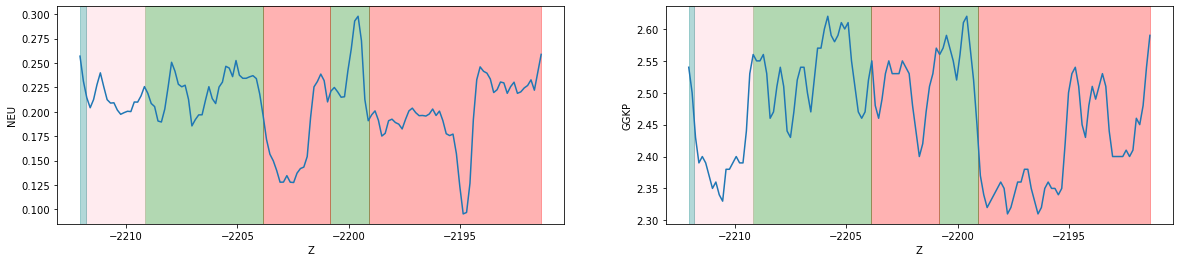

In [15]:
z, ggkp, neu = view_well_file.view_well(20, target_layers)

In [16]:
z.shape

(137,)

In [17]:
z_interp, ggkp_interp = interpolation.interpolate_lin(z, ggkp, 200)

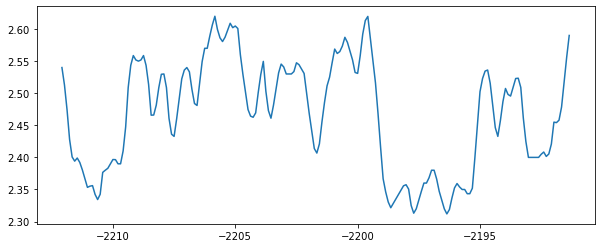

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(z_interp, ggkp_interp)
plt.show()

189.1076115485545


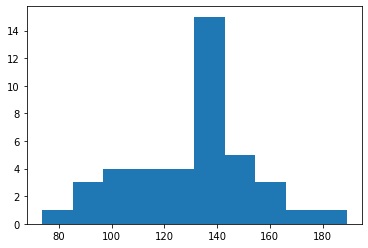

In [19]:
plt.hist((target_layers.upper - target_layers.lower) / 0.1524)
print(max((target_layers.upper - target_layers.lower) / 0.1524))
plt.show()

In [20]:
##Сначала немного обработаем кривые: разделим кривую на 100 точек

In [21]:
data_ = []
z_ = []
for well_index in range(len(well_idx)):
    las = lasio.read(os.path.join(DATA_DIR, f"{target_layers.iloc[well_index]['Well identifier']}_continuous.las"))
    target_layer_idx = np.where((las['Z'] < target_layers.iloc[well_index].upper) & (las['Z'] > target_layers.iloc[well_index].lower))
    data_interp = interpolation.interpolate_lin(las["Z"][target_layer_idx], las["GGKP"][target_layer_idx], 200)
    data_.append(data_interp[1])
    z_.append(data_interp[0])

data = np.empty(len(data_), dtype=object)
z = np.empty(len(z_), dtype=object)
for i, sublist in enumerate(data_):
    data[i] = np.array(sublist)
for i, sublist in enumerate(z_):
    z[i] = np.array(sublist)    
data = np.vstack(data)
z = np.vstack(z)

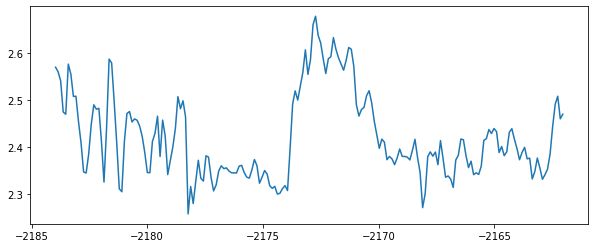

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(z[0], data[0])
plt.show()

In [30]:
def splitting(z, ggkp, t_ir=201, t_uv=11):
    data_size = len(z)
    average_ggkp = np.zeros(data_size)

    # обрезаем низкие частоты
    for ind in range(data_size):
        average_ggkp[ind] = np.average(ggkp[max(0, ind - int(t_ir / 2)):min(ind + int(t_ir / 2), data_size)])
    not_ir_ggkp = ggkp - average_ggkp

    # обрезаем высокие частоты
    not_ir_uv_ggkp = np.zeros(data_size)
    for ind in range(data_size):
        not_ir_uv_ggkp[ind] = np.average(not_ir_ggkp[max(0, ind - int(t_uv / 2)):min(ind + int(t_uv / 2), data_size)])

    # ищем пересечения с 0 -- они будут нашими границами участков классов
    borders = np.zeros(0)
    for ind in range(1, data_size):
        if not_ir_uv_ggkp[ind - 1] * not_ir_uv_ggkp[ind] < 0:
            borders = np.append(borders, z[ind])
    return borders

In [24]:
for k in range (len(data_)):
    print(splitting(z[k], data[k]))

[-2182.41994333 -2182.08949963 -2181.53876012 -2181.20831642
 -2180.98802062 -2178.78506259 -2178.67491469 -2173.71825913
 -2169.75293468 -2162.15272949]
[-2173.84279969 -2173.26102926 -2172.76236889 -2167.19399476
 -2163.95270235 -2159.63097914]
[-2187.36682467 -2183.45819022 -2180.55176974 -2175.03959295
 -2173.8369362  -2172.33361526]
[-2185.88785874 -2180.02570737 -2176.73934979 -2171.6765827 ]
[-2177.67827903 -2174.71305577 -2173.86584912 -2169.10031173
 -2165.71148514 -2163.06396436 -2162.64036104 -2157.98072448]
[-2170.97502195 -2170.26504012 -2166.20800106 -2165.49801923
 -2164.28090751 -2153.02262413]
[-2164.8047397  -2164.18905555 -2162.6498452  -2162.13677508
 -2161.21324887 -2158.64789828 -2158.23744219 -2155.46686355
 -2154.85117941 -2152.90151296 -2152.38844284 -2150.33616237
 -2148.79695202 -2148.38649593 -2146.9498996 ]
[-2148.79487487 -2140.25553633 -2136.79656376 -2130.41908307]
[-2160.6027362  -2159.38164482 -2157.34649251 -2155.61661305
 -2154.19200644 -2152.8691574

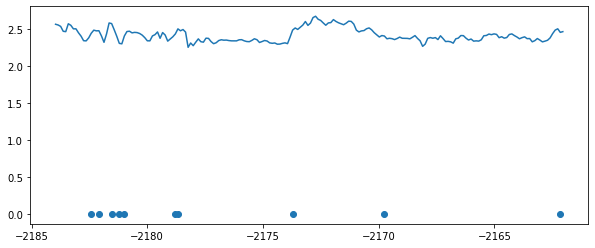

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(z[0], data[0])
x = splitting(z[0], data[0])
y = np.zeros(x.shape[0])
plt.scatter(x, y)
plt.show()

In [26]:
##Посчитаем  градиенты этих массивов

In [27]:
data_grad = np.gradient(data, axis = 1)

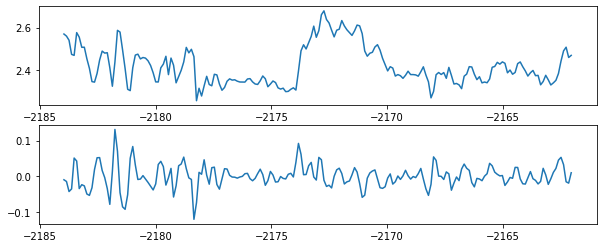

In [28]:
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(z[0], data[0])
plt.subplot(2, 1, 2)
plt.plot(z[0], data_grad[0])
plt.show()

In [29]:
split_points = []
for i in range(len(data[0])):
    split = splitting(z[0],data[0])
    split_point = 0
    for k in range(split.shape[0]):
        if z[0][i] == split[k]:
            split_point = 1
    split_points.append(split_point)
print(split_points)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [31]:
## Разделим массив: линии раздела проходят по тем точкам, которые возвращает splitting

In [32]:
data_redone = []
for i in range(len(data[0])):
    split = splitting(z[0],data[0])
    split_point = data[0][i]
    for k in range(split.shape[0]):
        if z[0][i] == split[k]:
            split_point = 0
    data_redone.append(split_point)
from itertools import takewhile  
def split0(a): 
    it = iter(a) 
    return [[x for x in takewhile(bool, it)] for _ in range(a.count(0) + 1)]

data_redone = split0(data_redone)

data_new= np.empty(len(data_redone), dtype=object)
for i, sublist in enumerate(data_redone):
    data_new[i] = np.array(sublist)  
print(data_new)
print(len(data_new[2]))

[array([2.57      , 2.56022236, 2.54088943, 2.47466951, 2.47      ,
        2.57665855, 2.55533658, 2.50778251, 2.50822114, 2.45400852,
        2.4088943 , 2.34712153, 2.34466342, 2.38554676])
 array([2.48999391, 2.48067316])
 array([2.41203165, 2.32534875, 2.43882126, 2.58731345])
 array([2.496028  , 2.40802922]) array([2.30484485])
 array([2.47138306, 2.47565506, 2.45337811, 2.46      , 2.45703812,
        2.44449249, 2.42236309, 2.38831241, 2.3457412 , 2.34537023,
        2.41171316, 2.42903024, 2.46573388, 2.37979921, 2.45735796,
        2.42394694, 2.34139333, 2.37076897, 2.40019281])
 array([], dtype=float64)
 array([2.48172847, 2.49843145, 2.46396958, 2.25761181, 2.31591367,
        2.27970051, 2.3272259 , 2.37186803, 2.33344666, 2.32755077,
        2.38139855, 2.37859641, 2.33536794, 2.30656342, 2.31953052,
        2.34890616, 2.36      , 2.35411419, 2.35567769, 2.34905433,
        2.34527056, 2.34493169, 2.34486605, 2.35932759, 2.36107693,
        2.34574072, 2.33594298, 2.333

In [33]:
##Теперь всё то же самое, только для всех кривых

In [34]:
data_redone_true = []
z_redone_true = []
for j in range(len(data)):
    data_redone = []
    z_redone = []
    for i in range(len(data[j])):
        split = splitting(z[j],data[j])
        split_point_data = data[j][i]
        split_point_z = z[j][i]
        for k in range(split.shape[0]):
            if z[j][i] == split[k]:
                split_point_data = 0
                split_point_z = 0
        data_redone.append(split_point_data)
        z_redone.append(split_point_z)
    data_redone_local = split0(data_redone)
    z_redone_local = split0(z_redone)
    for k in range(len(data_redone_local)):
        data_redone_true.append(data_redone_local[k])
        z_redone_true.append(z_redone_local[k])
data_new= np.empty(len(data_redone_true), dtype=object)
z_new= np.empty(len(z_redone_true), dtype=object)
for i, sublist in enumerate(data_redone_true):
    data_new[i] = np.array(sublist)  
for i, sublist in enumerate(z_redone_true):
    z_new[i] = np.array(sublist)  

data_new_new= []
z_new_new= []
for data_iter in data_new:
    if data_iter.shape[0] > 5:
        data_new_new.append(data_iter)

for z_iter in z_new:
    if z_iter.shape[0] > 5:
        z_new_new.append(z_iter)
pair_of_elements = []

data_new_newinterp = np.empty(len(data_new_new), dtype=object)
for k in range (len(data_new_new)): 
    data_new_newinterp[k] = interpolation.interpolate_lin(z_new_new[k], data_new_new[k], 6)[0]
data_new_newinterp = np.vstack(data_new_newinterp)

print(data_new_newinterp.shape)

(291, 6)


In [35]:
##Обучаем на KMeans и ищем наиболее оптимальное число кластеров

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_new_newinterp)

silhouette = []
for k in range (8, 20, 1):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    silhouette_local = silhouette_score(data_new_newinterp, kmeans.fit_predict(data_new_newinterp))
    silhouette.append(silhouette_local)
# Print the cluster labels
print("Max silhouette_score", max(silhouette))
print("Max silhouette_score on", silhouette.index(max(silhouette)) + 8)
kmeans = KMeans(n_clusters= silhouette.index(max(silhouette)) + 8, random_state=42).fit(data_new_newinterp)
labels = kmeans.labels_
print("Cluster labels:", labels)

Max silhouette_score 0.5253443632411778
Max silhouette_score on 12
Cluster labels: [ 7  7  5  5  1  5  5  5  1  1 11  7  7  7  5  5  5  5  7  7  5  5  5  5
  5  5  5  1  1 11  5  1  1  1 11 10  1  1  1 11 11 10 10 10 10 10  4  6
  0  0  1 11 11 11 11 10 10 10 10  4  4  4  4  6  6  6  0  0  5  5  5  1
  1 11 11 10 10 10  4  4  6  0  4  4  6  6  0  0  0  0  0  8  8  8 11 11
 10 10  4  4  4  6  6  0  0  8  3  3  6  0  0  0  0  8  8  8  8  1 11 10
  4  4  6  6  6  2  2  2  2  2  7  7  7  7  7  9  9  9  9  9  9  9  2  9
  9  9  2  2  2  2  2  2  2  2  2  2  7  4  4  6  6  6  6  8  3  3  3  0
  0  8  8  8  3  3  4  6  6  0  8  8  8 10  4  6  0  4  6  6  6  6  0  0
  0  0  0 10 10 10  4  0  0  0  8  8  8  3  3  3  3  3  3  3  4  6  0  0
  3  3  3  3  3  6  6  0  0  8  8  8 10 10  4  4  6  6  6  6  0  8  8  8
  3  5  1  1  1 11 11 11 11 11 10  6  6  6  0  0  0  4  6  0  0  0  0  0
  8  8  0  0  8  8  3  3  3 10 10 10  4  4  6  6  0 11 11 10 10 10 10  4
  4  4  6]


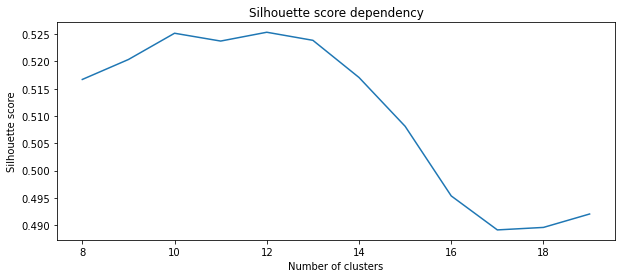

In [37]:
plt.figure(figsize=(10, 4))
x = np.array([i for i in range (8, 20, 1)])
y = np.array(silhouette)
plt.title("Silhouette score dependency")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.plot(x, y)
plt.savefig("silhouette_score.png")
plt.show()

In [38]:
background_start = []
background_end = []
print(len(z_new_new))
for k in range(len(z_new_new)):
    background_start.append(z_new_new[k][0])
    background_end.append(z_new_new[k][-1])

291


In [39]:
print(background_start, background_end)

[-2183.96201395201, -2180.8778727155523, -2178.564766788209, -2173.6081112296165, -2169.6427867827424, -2175.33878079986, -2173.759689628133, -2172.6792588264248, -2167.110884694545, -2163.869592289421, -2159.5478690825885, -2190.47368794612, -2187.2666032719253, -2183.3579688252503, -2180.451548339261, -2174.9393715554884, -2173.736714802665, -2172.233393861636, -2188.64129347198, -2185.7990382633434, -2179.93688689553, -2176.6505293105433, -2171.587762220159, -2178.84318817109, -2177.5723782000705, -2174.6071549343583, -2173.759948287012, -2168.994410895689, -2165.6055843063036, -2162.534460209673, -2170.8735959735995, -2170.163614139008, -2166.1065750842, -2165.3965932496085, -2164.1794815331664, -2152.9211981560743, -2167.37009028485, -2164.0864415308656, -2162.0341610596256, -2161.1106348475673, -2158.134828164269, -2154.7485653867225, -2152.285828821234, -2150.233548349994, -2148.283881902316, -2150.84863984048, -2148.6867819812323, -2140.147443437206, -2136.6884708624107, -2130.

In [40]:
colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'maroon',
    6: 'cyan',
    7: 'magenta',
    8: 'lime',
    9: 'pink',
    10: 'teal',
    11: 'brown'
}

In [41]:
colors[list(colors.keys())[4]]


'orange'

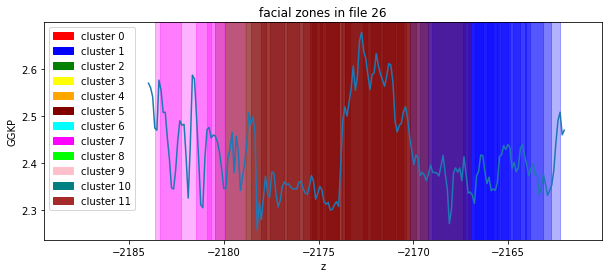

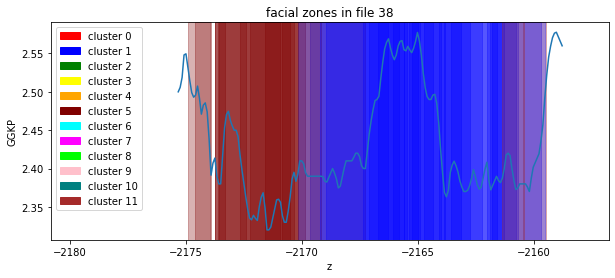

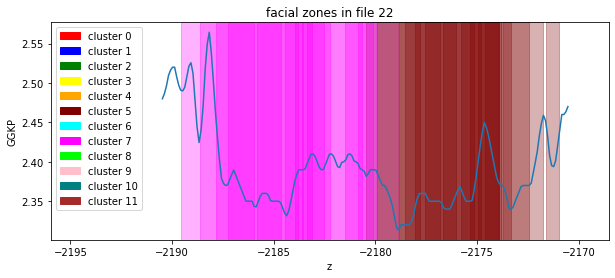

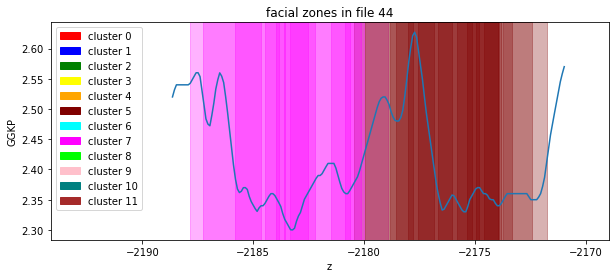

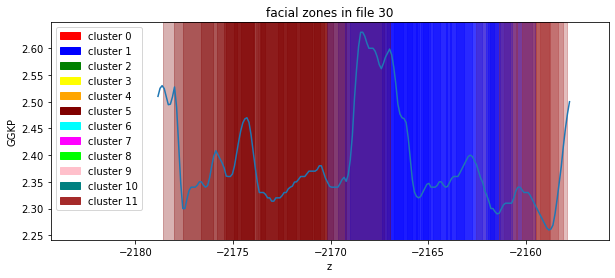

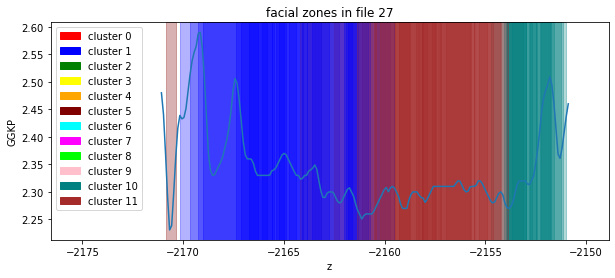

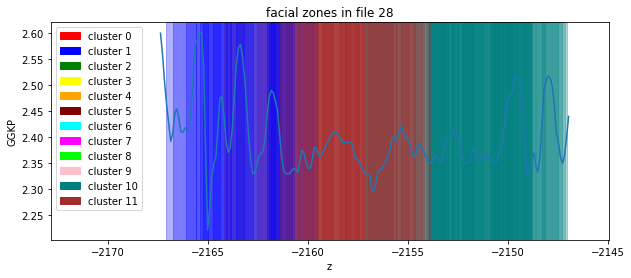

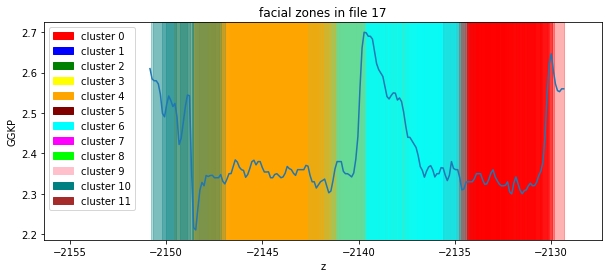

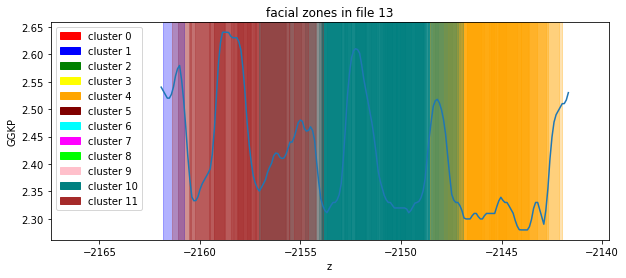

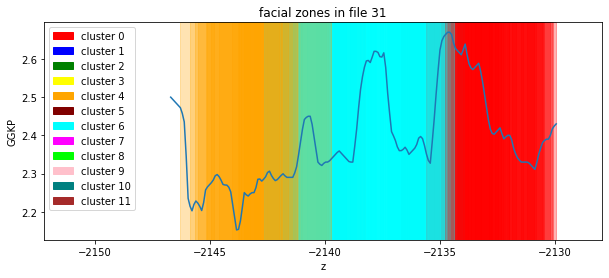

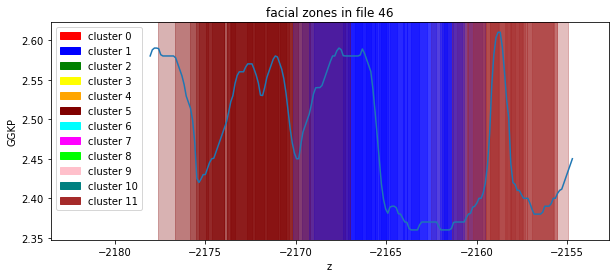

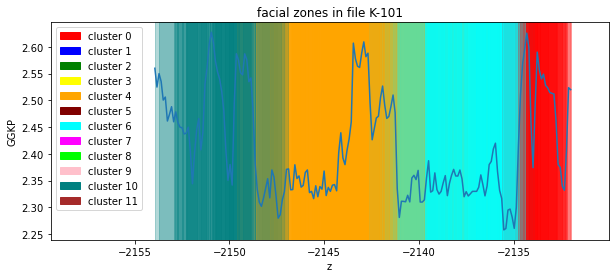

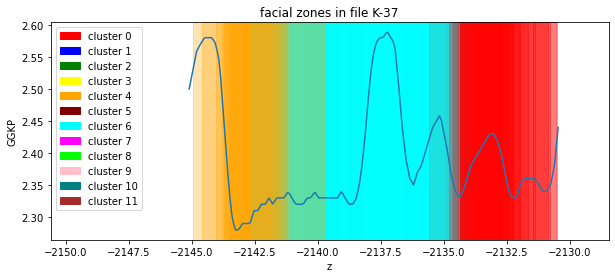

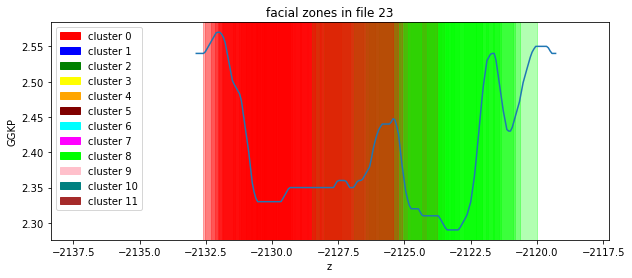

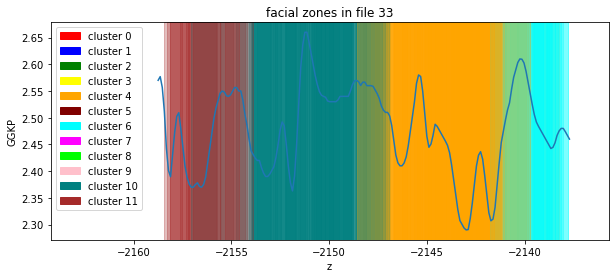

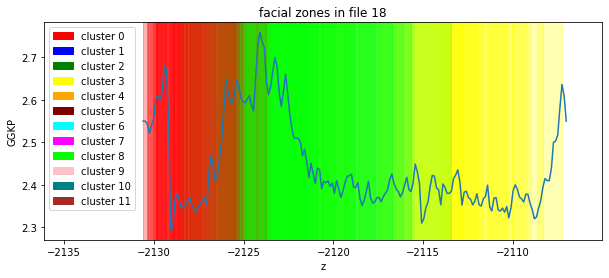

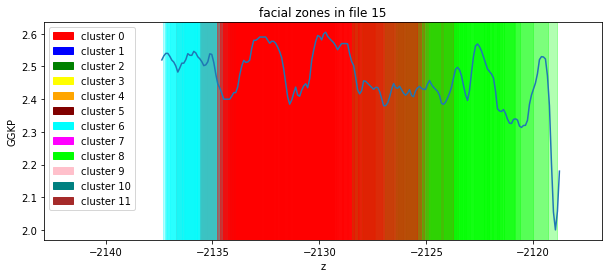

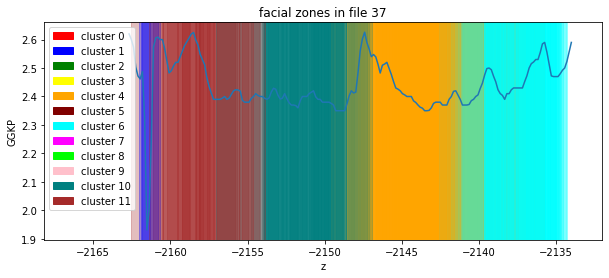

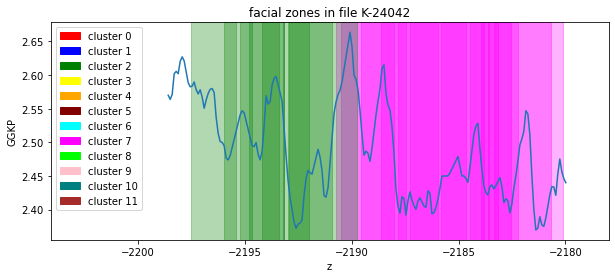

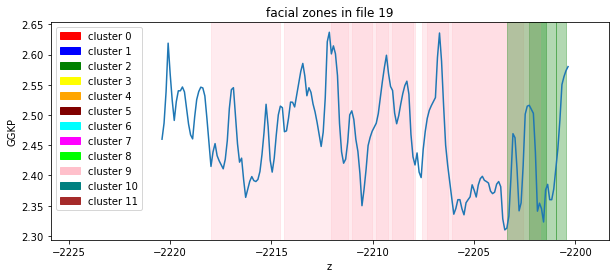

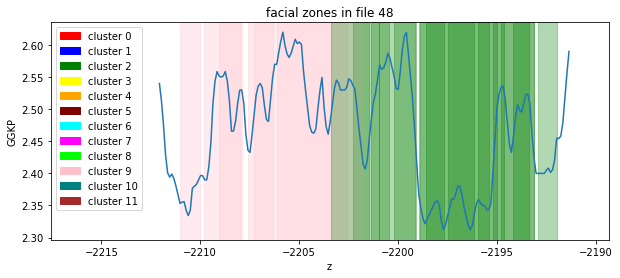

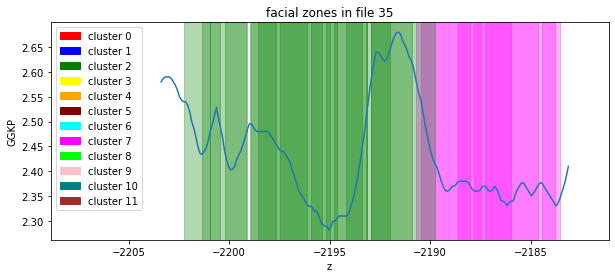

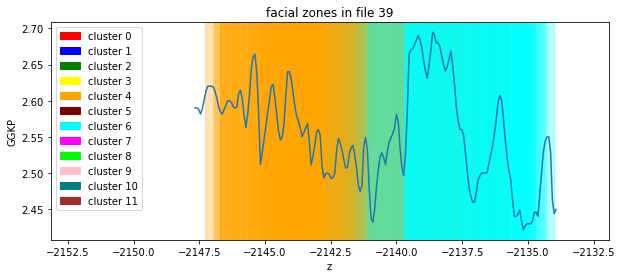

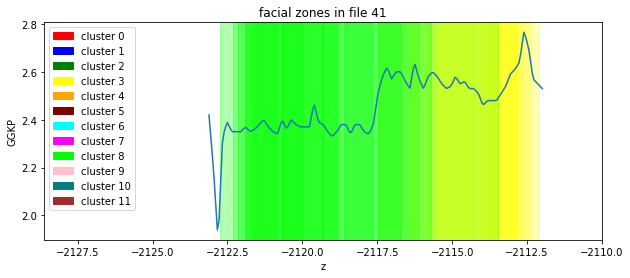

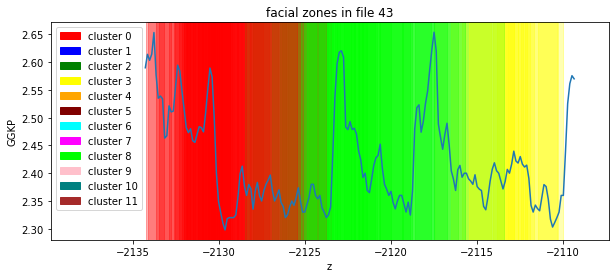

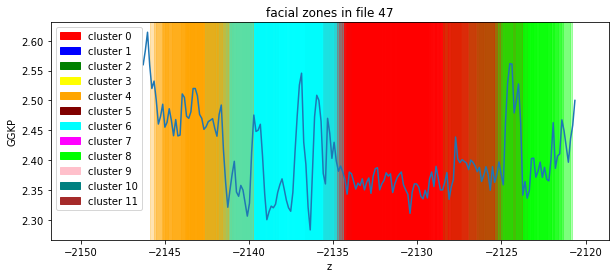

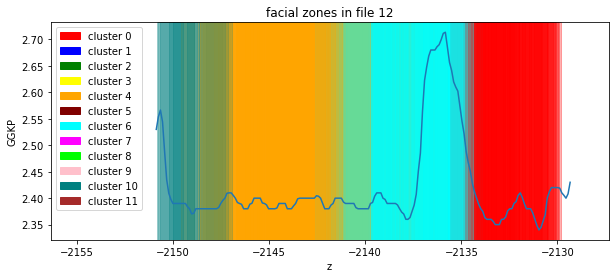

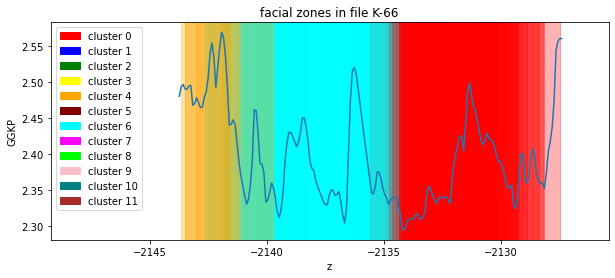

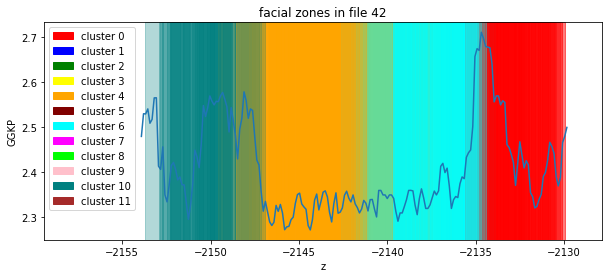

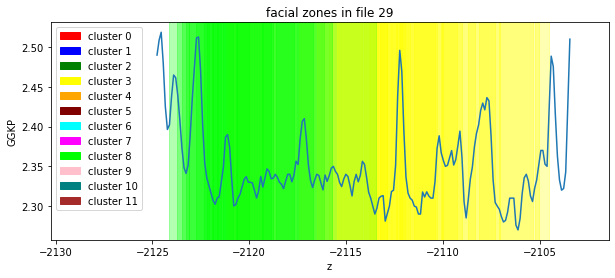

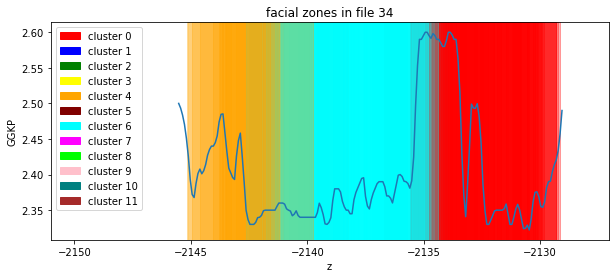

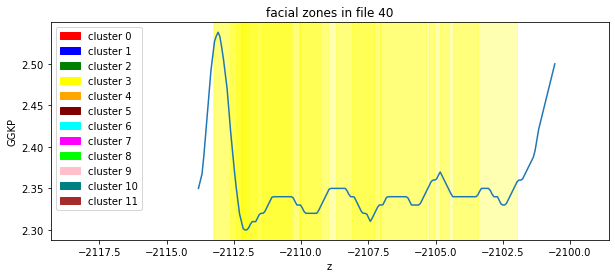

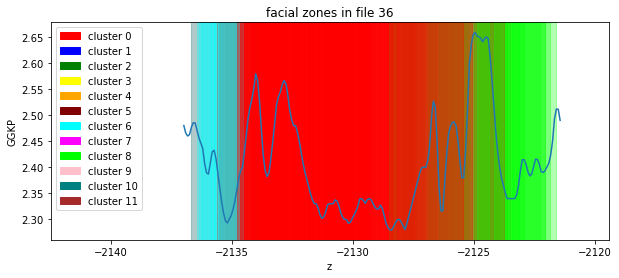

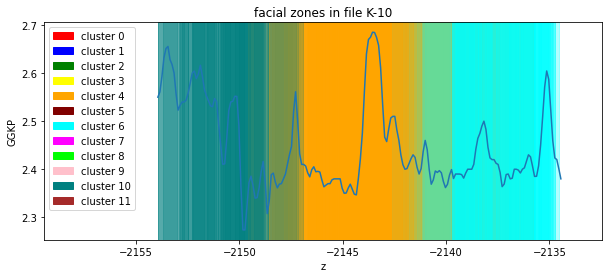

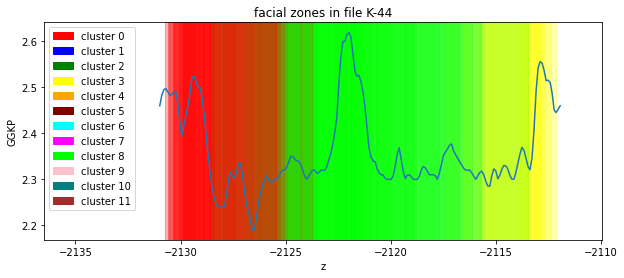

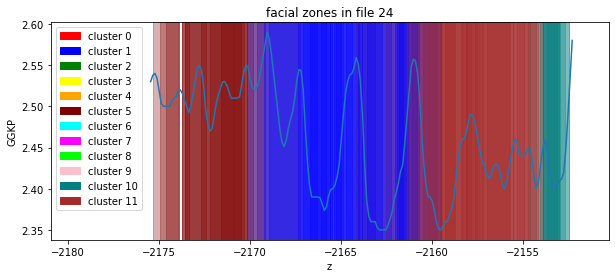

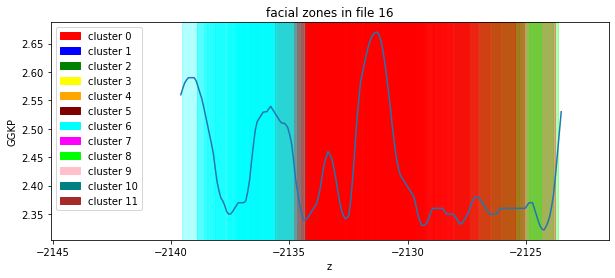

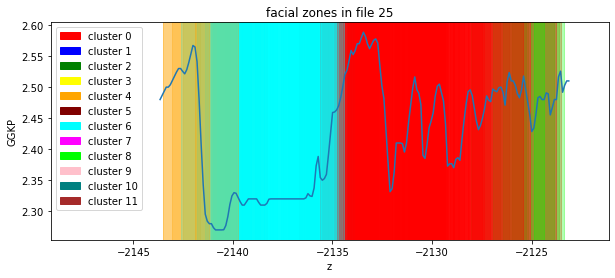

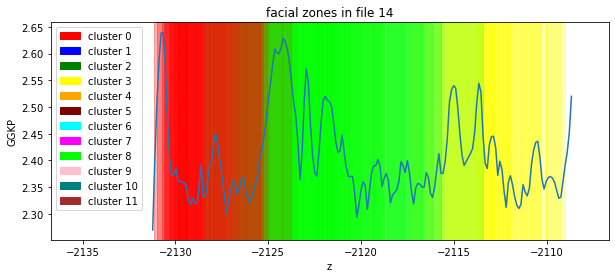

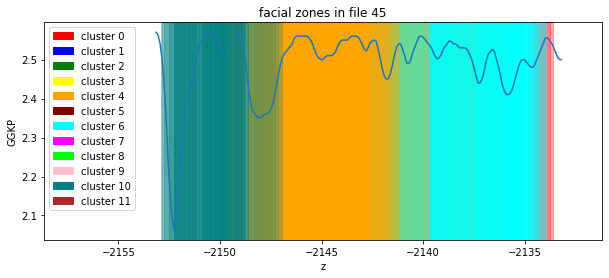

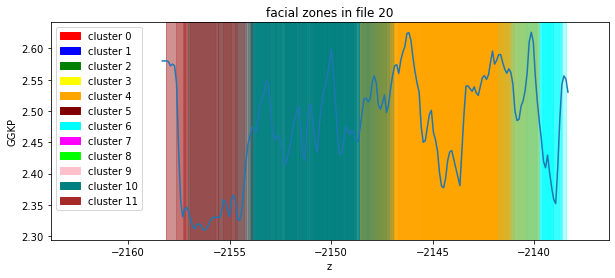

In [42]:
import matplotlib.patches as mpatches
for files in range(len(well_idx)):
    plt.figure(figsize=(10, 4))
    plt.plot(z[files], data[files])
    for k in range(len(z_new_new)):
        if (min(z[files]) < background_start[k]) and (max(z[files]) > background_end[k]):
            color = colors[list(colors.keys())[labels[k]]]
            plt.axvspan(background_start[k], background_end[k], color=color, alpha=0.3)
    plt.title("facial zones in file "+list(well_idx)[files])
    plt.xlim([min(z[files]) - 5.5, max(z[files]) + 2])
    plt.xlabel("z")
    plt.ylabel("GGKP")
    patches = []
    for col in range(len(list(colors.keys()))):
         patches.append(mpatches.Patch(color= colors[list(colors.keys())[col]], label='cluster '+str(col)))
    plt.legend(loc="upper left", handles=patches)
    plt.savefig("facial zones in file "+list(well_idx)[files]+".png")
    plt.show()

In [205]:
print(list(well_idx)[0])

30
